In [1]:
# perturbed bulk flow equations
from sympy import *
import numpy as np
init_printing()
import numpy as np

continuity

\begin{equation}
\sigma \frac{\partial \left( \rho h \right)}{\partial t} +
\frac{\partial \left( \rho h v_x \right)}{\partial x} +
\frac{\partial \left( \rho h v_y \right)}{\partial y}
 = 0
\end{equation}

axial momentum

\begin{equation}
\sigma \frac{\partial \left( \rho h v_x \right)}{\partial t} +
\frac{\partial \left( \rho h v_x^2 \right)}{\partial x} +
\frac{\partial \left( \rho h v_x v_y \right)}{\partial y} =
- \frac{\partial p }{\partial x } h - 
0.5 \frac{R}{C} \rho \left( f_r v_r + f_s v_s \right) v_x
\end{equation}

The axial momentum equation can be simplifed using the continuity equation to...

\begin{equation}
 \rho h \left( \sigma \frac{\partial v_x}{\partial t} +
v_x \frac{\partial v_x}{\partial x} +
v_y \frac{\partial v_x}{\partial y} \right) =
- \frac{\partial p }{\partial x } h - 
0.5 \frac{R}{C} \rho \left( f_r v_r + f_s v_s \right) v_x
\end{equation}

but it may advantageous to retain the previous conservative form to facilitate finite volume discretization

circumferential momentum 

\begin{equation}
\sigma \frac{\partial \left( \rho h v_y \right)}{\partial t} +
\frac{\partial \left( \rho h v_x v_y \right)}{\partial x} +
\frac{\partial \left( \rho h v_y^2 \right)}{\partial y} =
- \frac{\partial p }{\partial y } h - 
0.5 \frac{R}{C} \rho \left( f_r v_r + f_s v_s \right) v_y +
0.5 \frac{R}{C} \rho f_r v_r \frac{ \Omega R}{u_*}
\end{equation}


Pertubed variables

$h = h_0 + \epsilon_{\psi} h_{\psi} e^{i t}$

$v_x = v_{x0} + \epsilon_{\psi} v_{x,\psi}  e^{i t}$

$v_y = v_{y0} + \epsilon_{\psi} v_{y,\psi}  e^{i t}$

$p = p_0 + \epsilon_{\psi} p_{\psi}   e^{i t}$

$v_r = v_{r0} + \epsilon_{\psi} v_{r,\psi}  e^{i t}$

$v_s = v_{s0} + \epsilon_{\psi} v_{s,\psi}  e^{i t}$

$f_r = f_{r0} + \epsilon_{\psi} f_{r,\psi}  e^{i t}$

$f_s = f_{s0} + \epsilon_{\psi} f_{s,\psi}  e^{i t}$

Note that $t$ in the harmonic component is really dimensionless time $\omega t$ and $\psi = X,Y$

In [2]:
e,x,y,t,sigma = symbols('epsilon x y t sigma')
R, C, n, m, rot = symbols('R C n m Omega')
#rho,mu = symbols('rho mu')
mu = symbols('mu')
u_scale = symbols('u_*')
#us0, ur0, fs0 = symbols('u_{s0} u_{r0} f_{s0}')

In [3]:
h0 = Function('h_0')(x,y)
h1 = Function('h_{\psi}')(x,y)
#h = h0 + dx*diff(h0,x)*exp(I*omega*t)+dy*diff(h0,y)*exp(I*omega*t)
h = h0 + e*h1*exp(I*t)
p0 = Function('p_0')(x,y)
p1 = Function('p_{\psi}')(x,y)
#p = p0 + dx*diff(p0,x)*exp(I*omega*t)+dy*diff(p0,y)*exp(I*omega*t)
p = p0 + e*p1*exp(I*t)
vx0 = Function('v_{x0}')(x,y)
vx1 = Function('v_{x,\psi}')(x,y)
#u = u0 + dx*diff(u0,x)*exp(I*omega*t)+dy*diff(u0,y)*exp(I*omega*t)
vx = vx0 + e*vx1*exp(I*t)
vy0 = Function('v_{y0}')(x,y)
vy1 = Function('v_{y,\psi}')(x,y)
#v = v0 + dx*diff(v0,x)*exp(I*omega*t)+dy*diff(v0,y)*exp(I*omega*t)
vy = vy0 + e*vy1*exp(I*t)

vs0 = Function('v_{s0}')(x,y)
vs1 = Function('v_{s,\psi}')(x,y)
vs = vs0 + e*vs1*exp(I*t)

vr0 = Function('v_{r0}')(x,y)
vr1 = Function('v_{r,\psi}')(x,y)
vr = vr0 + e*vr1*exp(I*t)

fs0 = Function('f_{s0}')(x,y)
fs1 = Function('f_{s,\psi}')(x,y)
fs = fs0 + e*fs1*exp(I*t)

fr0 = Function('f_{r0}')(x,y)
fr1 = Function('f_{r,\psi}')(x,y)
fr = fr0 + e*fr1*exp(I*t)

# density varies
#rho0 = Function('rho_0')(x,y)
#rho1 = Function('rho_1')(x,y)
#rho = rho0 + e*rho1*exp(I*omega*t)

# density is constant
rho0, rho = symbols('rho_0 rho')

#us0 = sqrt(u0**2 + v0**2)
#ur0 = sqrt(u0**2 + (v0 - R * rot)**2)

# Taylor series expanded rotor and stator velocities

#us = us0 + diff(us0, u0) * (e*u1)*exp(I*omega*t) + diff(us0, v0) * (e*v1)*exp(I*omega*t)
#ur = ur0 + diff(ur0, u0) * (e*u1)*exp(I*omega*t) + diff(ur0, v0) * (e*v1)*exp(I*omega*t)

## Conservation of mass / continuity

In [4]:
c1 = diff( expand( sigma * rho * h ) , t )

In [5]:
c2 = diff( expand( rho * h * vx  ) , x )

In [6]:
c3 = diff( expand( rho * h * vy  ) , y )

### zeroth order

In [7]:
zeroth_c1 = c1.coeff(e,0)
#zeroth_cxy_c1 = zeroth_cx_c1.coeff(dy,0)
#
zeroth_c2 = c2.coeff(e,0)
#zeroth_cxy_c2 = zeroth_cx_c2.coeff(dy,0)
#
zeroth_c3 = c3.coeff(e,0)
#zeroth_cxy_c3 = zeroth_cx_c3.coeff(dy,0)

In [8]:
zeroth_c1

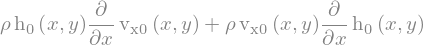

In [9]:
zeroth_c2

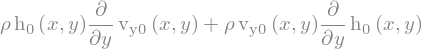

In [10]:
zeroth_c3

### first-order, $\epsilon$

In [11]:
first_c1 = c1.coeff(e,1)
#
first_c2 = c2.coeff(e,1)
#
first_c3 = c3.coeff(e,1)

In [12]:
first_c1

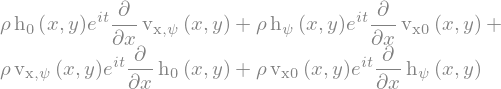

In [13]:
first_c2

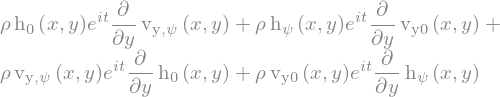

In [14]:
first_c3

## Axial momentum

In [15]:
ax1 = diff( expand( sigma * rho * h * vx ) , t )

In [16]:
ax2 = diff( expand( rho * h * vx**2  ) , x )

In [17]:
ax3 = diff( expand( rho * h * vx * vy ) , y )

In [18]:
ax4 = expand( - h * diff( p,  x ) )

In [19]:
ax5 = expand( - 0.5 * R / C * rho * (fr * vr + fs * vs) * vx )
#ax5 = expand( - (fr * ur - fs * us) * u )

### Zeroth order

In [20]:
zeroth_ax1 = ax1.coeff(e,0)
#
zeroth_ax2 = ax2.coeff(e,0)
#
zeroth_ax3 = ax3.coeff(e,0)
#
zeroth_ax4 = ax4.coeff(e,0)
#
zeroth_ax5 = ax5.coeff(e,0)

In [21]:
zeroth_ax1

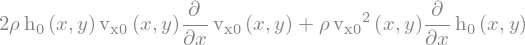

In [22]:
zeroth_ax2

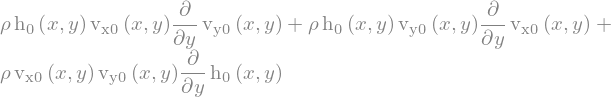

In [23]:
zeroth_ax3

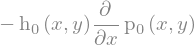

In [24]:
zeroth_ax4

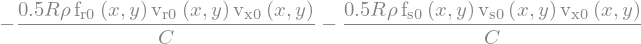

In [25]:
zeroth_ax5

In [26]:
#ax5

### first-order, $\epsilon$

In [27]:
first_ax1 = ax1.coeff(e,1)
#
first_ax2 = ax2.coeff(e,1)
#
first_ax3 = ax3.coeff(e,1)
#
first_ax4 = ax4.coeff(e,1)
#
first_ax5 = ax5.coeff(e,1)

In [28]:
first_ax1

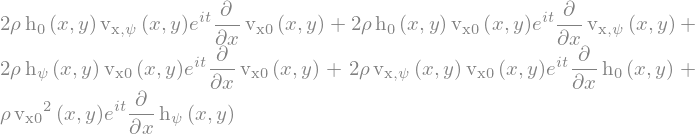

In [29]:
first_ax2

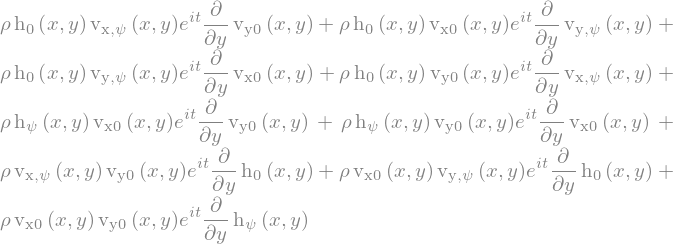

In [30]:
first_ax3

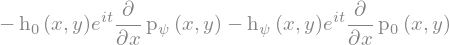

In [31]:
first_ax4

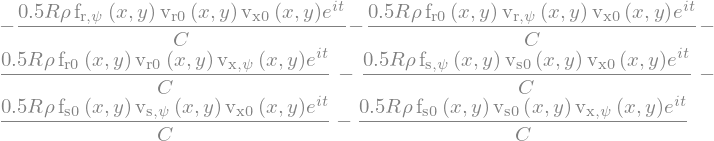

In [32]:
# us00, ur00 = symbols('u_s0 u_r0')
# fr00, fs00 = symbols('f_r0 f_s0')
# first_ax5 = first_ax5.subs(us0, us00)
# first_ax5 = first_ax5.subs(ur0, ur00)
# first_ax5 = first_ax5.subs(expand(ur0), ur00)
# first_ax5 = first_ax5.subs(fr0, fr00)
# first_ax5 = first_ax5.subs(fs0, fs00)

display(first_ax5)

## Circumferential momentum

In [33]:
circ1 = diff( expand( sigma * rho * h * vy ) , t )

In [34]:
circ2 = diff( expand( rho * h * vx * vy  ) , x )

In [35]:
circ3 = diff( expand( rho * h * vy **2 ) , y )

In [36]:
circ4 = expand( - h * diff( p,  y ) )

In [37]:
circ5 = expand( - 0.5 * R / C * rho * (fr * vr + fs * vs) * vy ) + \
    expand( 0.5 * R / C * rho * fr * vr * R * rot / u_scale)

### zeroth order

In [38]:
zeroth_circ1 = circ1.coeff(e,0)
#
zeroth_circ2 = circ2.coeff(e,0)
#
zeroth_circ3 = circ3.coeff(e,0)
#
zeroth_circ4 = circ4.coeff(e,0)
#
zeroth_circ5 = circ5.coeff(e,0)

In [39]:
zeroth_circ1

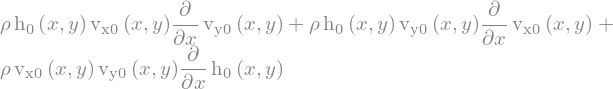

In [40]:
zeroth_circ2

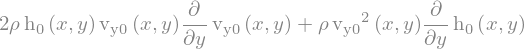

In [41]:
zeroth_circ3

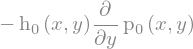

In [42]:
zeroth_circ4

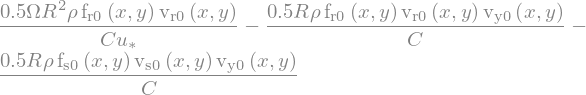

In [43]:
zeroth_circ5

### first-order, $\epsilon$

In [44]:
first_circ1 = circ1.coeff(e,1)
#
first_circ2 = circ2.coeff(e,1)
#
first_circ3 = circ3.coeff(e,1)
#
first_circ4 = circ4.coeff(e,1)
#
first_circ5 = circ5.coeff(e,1)

In [45]:
first_circ1

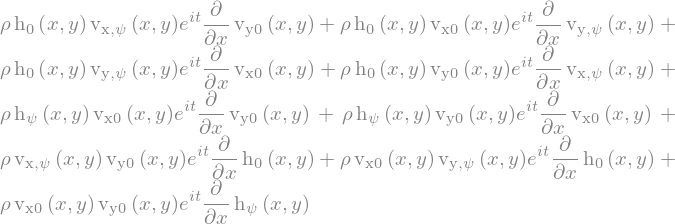

In [46]:
first_circ2

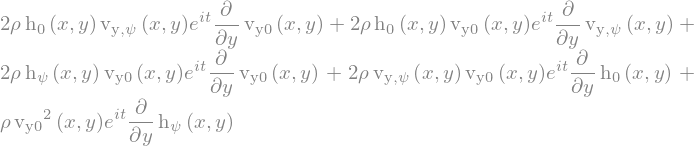

In [47]:
first_circ3

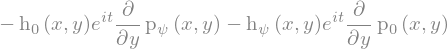

In [48]:
first_circ4

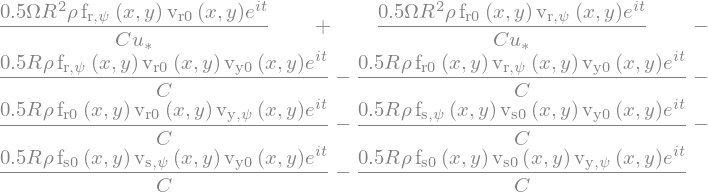

In [49]:
# first_circ5 = first_circ5.subs(us0, us00)
# first_circ5 = first_circ5.subs(ur0, ur00)
# first_circ5 = first_circ5.subs(expand(ur0), ur00)
# first_circ5 = first_circ5.subs(fr0, fr00)
# first_circ5 = first_circ5.subs(fs0, fs00)

display(first_circ5)